# Fashion MNIST classification

In this exercise, you will use a neural network on a simple classification task: classifying images of clothes into 10 classes.

You can first download the data, that is available using `tensorflow.keras.dataset.fashion_mnist.load_data()`.

In [1]:
# Download the dataset
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

This dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

Explore the data: display some images with the associated label.

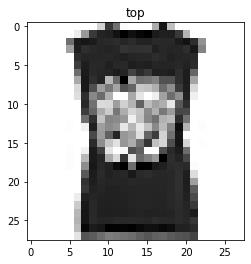

In [2]:
# TODO: Explore the data, display some input images
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap='gray_r')
plt.title(label_class[y_train[idx]])
plt.show()


**Before going further**: what methods could you use to perform such a classification task?

---

The first method you will try is using neural networks. First step is the data preparation: data rescaling, label preparation.

> Hint: you can use the Keras function `tensorflow.keras.utils.to_categorical()`

In [3]:
# TODO: Make the data preparation
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

X_train_norm = X_train/255.
X_test_norm = X_test/255.

X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], X_train_norm.shape[1], X_train_norm.shape[2], 1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], X_test_norm.shape[1], X_test_norm.shape[2], 1)


Next step: model building with Keras. 

Build your neural network architecture.

At first, since the images are pretty small, it is recommended to try a light architecture: no more than 2 or 3 convolutional layers.

In [4]:
# TODO: Build your model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

def my_model(input_dim):
    model = Sequential()

    model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(Dense(units=10, activation = 'softmax'))
    
    return model

Now compile and fit your model on your training data.

In [5]:
# TODO: Compile and fit your model
model = my_model(input_dim=X_train_norm.shape[1])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_norm, y_train_cat, epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 223us/sample - loss: 0.6757 - accuracy: 0.7540
Epoch 2/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.4292 - accuracy: 0.8431
Epoch 3/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.3755 - accuracy: 0.8653
Epoch 4/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.3441 - accuracy: 0.8741
Epoch 5/10
60000/60000 [==============================] - 12s 200us/sample - loss: 0.3191 - accuracy: 0.8830
Epoch 6/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.3054 - accuracy: 0.8885
Epoch 7/10
60000/60000 [==============================] - 12s 201us/sample - loss: 0.2916 - accuracy: 0.8914
Epoch 8/10
60000/60000 [==============================] - 12s 201us/sample - loss: 0.2783 - accuracy: 0.8974
Epoch 9/10
60000/60000 [==============================] - 13s 218us/sample - loss: 0.2642 - accuracy: 0.9

Finally, compute the accuracy (and other metrics if you want) on the train and test datasets.

> Warning, tensorflow returns softmax output (so an array of 10 values between 0 and 1, for which the sum is equal to 1). To compute correctly the accuracy, you have to convert that array into a categorical array with zeros and a 1.

In [6]:
# TODO: Compute the accuracy of your model
print('accuracy on train with NN:', model.evaluate(X_train_norm, y_train_cat, verbose=0)[1])
print('accuracy on test with NN:', model.evaluate(X_test_norm, y_test_cat, verbose=0)[1])

accuracy on train with NN: 0.9058333
accuracy on test with NN: 0.8849


Feel free to improve those results playing with the architecture and all means you know.